In [31]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/690F project/processed_file.csv')
print(df.columns)
print(df.head())
# df = df.head(10000)

Index(['Unnamed: 0', 'quote_count', 'contributors', 'truncated', 'text',
       'is_quote_status', 'in_reply_to_status_id', 'reply_count', 'id',
       'favorite_count', 'entities', 'retweeted', 'coordinates',
       'timestamp_ms', 'source', 'in_reply_to_screen_name', 'id_str',
       'retweet_count', 'in_reply_to_user_id', 'favorited', 'retweeted_status',
       'user', 'geo', 'in_reply_to_user_id_str', 'lang', 'created_at',
       'filter_level', 'in_reply_to_status_id_str', 'place',
       'possibly_sensitive', 'extended_tweet', 'display_text_range',
       'quoted_status_permalink', 'quoted_status_id', 'quoted_status',
       'quoted_status_id_str', 'extended_entities', 'withheld_in_countries',
       'scopes'],
      dtype='object')
   Unnamed: 0  quote_count  contributors  truncated  \
0           0            0           NaN      False   
1           1            0           NaN      False   
2           2            0           NaN      False   
3           3            0     

<ipython-input-31-90c8dee279cf>:3: DtypeWarning: Columns (32,34,36,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/690F project/processed_file.csv')


In [32]:
df = df[df['lang'] == 'en']
df = df[df['text'].str.startswith('RT', na = False)]
print(df.head())
print(len(df))

    Unnamed: 0  quote_count  contributors  truncated  \
0            0            0           NaN      False   
1            1            0           NaN      False   
2            2            0           NaN      False   
10          10            0           NaN      False   
11          11            0           NaN      False   

                                                 text  is_quote_status  \
0   RT @CaesarsSports: Thursday Dingers is coming ...            False   
1   RT @Openly: Should sports bodies allow interse...            False   
2                        RT @TheSkyBlueHub: Defenders            False   
10  RT @wuptoy: Toy really grinding hard on 76... ...            False   
11  RT @cinder_katt: If its bluer ill see what i c...            False   

    in_reply_to_status_id  reply_count                   id  favorite_count  \
0                     NaN            0  1422682179906199556               0   
1                     NaN            0  1422682226488188940 

In [33]:
print(df['text'].head())

0     RT @CaesarsSports: Thursday Dingers is coming ...
1     RT @Openly: Should sports bodies allow interse...
2                          RT @TheSkyBlueHub: Defenders
10    RT @wuptoy: Toy really grinding hard on 76... ...
11    RT @cinder_katt: If its bluer ill see what i c...
Name: text, dtype: object


In [34]:
print(df.retweeted_status.head())

0     {'quote_count': 1, 'contributors': None, 'trun...
1     {'quote_count': 6, 'contributors': None, 'trun...
2     {'quote_count': 0, 'contributors': None, 'trun...
10    {'quote_count': 0, 'contributors': None, 'trun...
11    {'quote_count': 0, 'contributors': None, 'trun...
Name: retweeted_status, dtype: object


In [35]:
print(df.retweeted_status[2])

{'quote_count': 0, 'contributors': None, 'truncated': False, 'text': 'Defenders', 'is_quote_status': False, 'in_reply_to_status_id': 1422679583015542791, 'reply_count': 2, 'id': 1422679585838276611, 'favorite_count': 0, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'retweeted': False, 'coordinates': None, 'entities': {'user_mentions': [], 'symbols': [], 'polls': [{'duration_minutes': 1440, 'options': [{'position': 1, 'text': 'Danny Fox'}, {'position': 2, 'text': 'Jack Grimmer'}, {'position': 3, 'text': 'Elliot Ward'}, {'position': 4, 'text': 'Reda Johnson'}], 'end_datetime': 'Wed Aug 04 22:03:39 +0000 2021'}], 'hashtags': [], 'urls': []}, 'in_reply_to_screen_name': 'TheSkyBlueHub', 'id_str': '1422679585838276611', 'retweet_count': 1, 'in_reply_to_user_id': 1026138517523640321, 'favorited': False, 'user': {'follow_request_sent': None, 'profile_use_background_image': True, 'default_profile_image': False, 'id': 1026138517523640321, 'defaul

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
import numpy as np

texts = np.array(df['text'])
texts = list(set(texts))
print(texts[0:5])
print(len(texts))

['RT @sellcoup0n: TTA GIVEAWAY\n\n🎟️ 2 TTA Coupons = 60 tickets\n\nRT + follow @sellcoup0n \n\nEnd: 1 hour ✓', "RT @CoryCopelandH2O: Anonymous poll for people who work for public agencies.  Answer if you've ever conducted human subject research such a…", 'RT @vuejs: What is your preferred way of learning a new tech? (see below for explanations of each option)', 'RT @RealLordBrexitb: #NoVaccineApartheid #Novaccinepassports Should vaccines be mandatory? Please share', 'RT @AnswerThePole: @BRWrestling Who is better in their profession?']
11053


In [38]:
import json

retweets = np.array(df['retweeted_status'])
texts_post_preprocess = texts

# for i in range(len(retweets)):
#   # print(type(retweets[i]))
#   if type(retweets[i]) is float:
#     continue
#   t = eval(retweets[i])
#   # print(t)
#   # print(type(t))
#   # print(dict(retweets[i]))
#   if t['quote_count'] > 0:
#     texts_post_preprocess.append(texts[i])

texts_post_preprocess = np.array(texts_post_preprocess)
print(texts_post_preprocess[0:5])
print(len(texts_post_preprocess))

['RT @sellcoup0n: TTA GIVEAWAY\n\n🎟️ 2 TTA Coupons = 60 tickets\n\nRT + follow @sellcoup0n \n\nEnd: 1 hour ✓'
 "RT @CoryCopelandH2O: Anonymous poll for people who work for public agencies.  Answer if you've ever conducted human subject research such a…"
 'RT @vuejs: What is your preferred way of learning a new tech? (see below for explanations of each option)'
 'RT @RealLordBrexitb: #NoVaccineApartheid #Novaccinepassports Should vaccines be mandatory? Please share'
 'RT @AnswerThePole: @BRWrestling Who is better in their profession?']
11053


In [39]:
!pip install deep_translator

In [40]:
# new_text = texts_post_preprocess
new_text = []
for i in texts_post_preprocess:
  new_text.append(i.partition(':')[2])

print(new_text[0:5])

[' TTA GIVEAWAY\n\n🎟️ 2 TTA Coupons = 60 tickets\n\nRT + follow @sellcoup0n \n\nEnd: 1 hour ✓', " Anonymous poll for people who work for public agencies.  Answer if you've ever conducted human subject research such a…", ' What is your preferred way of learning a new tech? (see below for explanations of each option)', ' #NoVaccineApartheid #Novaccinepassports Should vaccines be mandatory? Please share', ' @BRWrestling Who is better in their profession?']


In [41]:
# from deep_translator import GoogleTranslator
# from concurrent.futures import ThreadPoolExecutor
# # new_text = texts[:10000]
# translated_texts = []
# # count = 0
# # for i in new_texts:
# #   translated_texts.append(GoogleTranslator(source='auto', target='en').translate(i))
# #   if count % 100 == 0:
# #     print('.',end = '')
# #   count += 1

# def translate_text(text):
#     return GoogleTranslator(source='auto', target='en').translate(text)

# with ThreadPoolExecutor(max_workers=16) as executor:
#     translated_texts = [*translated_texts, *list(executor.map(translate_text, new_texts))]
#     # print('.',end='')

# print(translated_texts[0:5])
# df1 = pd.DataFrame()
# df1['text'] = translated_texts
# df1.to_csv('/content/drive/MyDrive/690F project/temp.csv')

In [42]:
# from deep_translator import GoogleTranslator
# from concurrent.futures import ThreadPoolExecutor
# from tqdm import tqdm
# import pandas as pd
# from concurrent.futures import as_completed

# def translate_text(text, index):
#     try:
#         return index, GoogleTranslator(source='auto', target='en').translate(text)
#     except Exception as e:
#         print(f"Error translating text at index {index}: {e}")
#         return index, None  # Returning the original index with None as translation

# # new_text = [...]  # your list of texts to translate

# translated_texts = []
# with ThreadPoolExecutor(max_workers=32) as executor:
#     futures = [executor.submit(translate_text, text, idx) for idx, text in enumerate(new_text)]
#     for future in tqdm(as_completed(futures), total=len(new_text)):
#         translated_texts.append(future.result())

# # for i in new_text:
# #   translated_texts.append(translate_text(i, 0))

# # Sort the results based on the original indices
# translated_texts.sort(key=lambda x: x[0])
# translated_texts = [text for idx, text in translated_texts]  # Extract only the translated texts

# print(translated_texts[0:5])
# print(len(translated_texts))

# df1 = pd.DataFrame()
# df1['text'] = translated_texts
# df1.to_csv('/content/drive/MyDrive/690F project/temp.csv')


In [43]:
# print(translated_texts)
# translated_texts1 = list(set(translated_texts))
# print(translated_texts1)
# print(len(translated_texts1))
# df1 = pd.DataFrame()
# df1['text'] = translated_texts
# df1.to_csv('/content/drive/MyDrive/690F project/temp.csv')

In [44]:
# from sentence_transformers import SentenceTransformer

# model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# embeddings = []
# for i in translated_texts:
#     embeddings.append(model.encode(i))


In [45]:
!pip install sentence_transformers

In [46]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
translated_texts = new_text
# Function to process texts in batches
def process_batch(texts, batch_size=32):
    embeddings = []
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i + batch_size]
        embeddings.extend(model.encode(batch, show_progress_bar=True))
    return embeddings

# translated_texts = [...]  # your list of translated texts
embeddings = process_batch(translated_texts, batch_size=32)  # Adjust batch size as needed
print(embeddings[0:1])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:01<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

[array([-0.32734385,  0.13976754,  0.13807823, -0.28660583, -0.33651608,
        0.20731288,  0.18318322,  0.22631858,  0.28505433, -0.17717542,
       -0.07250364, -0.06305347, -0.030277  , -0.27883044,  0.01330472,
       -0.42166367,  0.35279307,  0.05283843, -0.15049553, -0.42017528,
        0.05728541, -0.5509794 , -0.7528002 ,  0.34054157, -0.02611862,
       -0.00964245, -0.17502123,  0.5133643 ,  0.25366324,  0.3960274 ,
       -0.00692273, -0.09040015, -0.3618621 ,  0.2691087 ,  0.07287565,
       -0.00902886, -0.5483116 , -0.3019059 , -0.09135614, -0.18757793,
       -0.01379794, -0.38425177, -0.3912233 ,  0.4549498 , -0.0254522 ,
        0.04026577, -0.24348614,  0.09081159,  0.30987665,  0.6666545 ,
        0.2629977 ,  0.2892795 , -0.07683726,  0.15253073,  0.05019832,
       -0.0423958 , -0.35485435,  0.11189833,  0.52248216,  0.08820738,
       -0.01749007, -0.04055563, -0.33926296,  0.3162402 , -0.0745644 ,
       -0.15756929, -0.33456513,  0.19794968, -0.27114385,  0.3

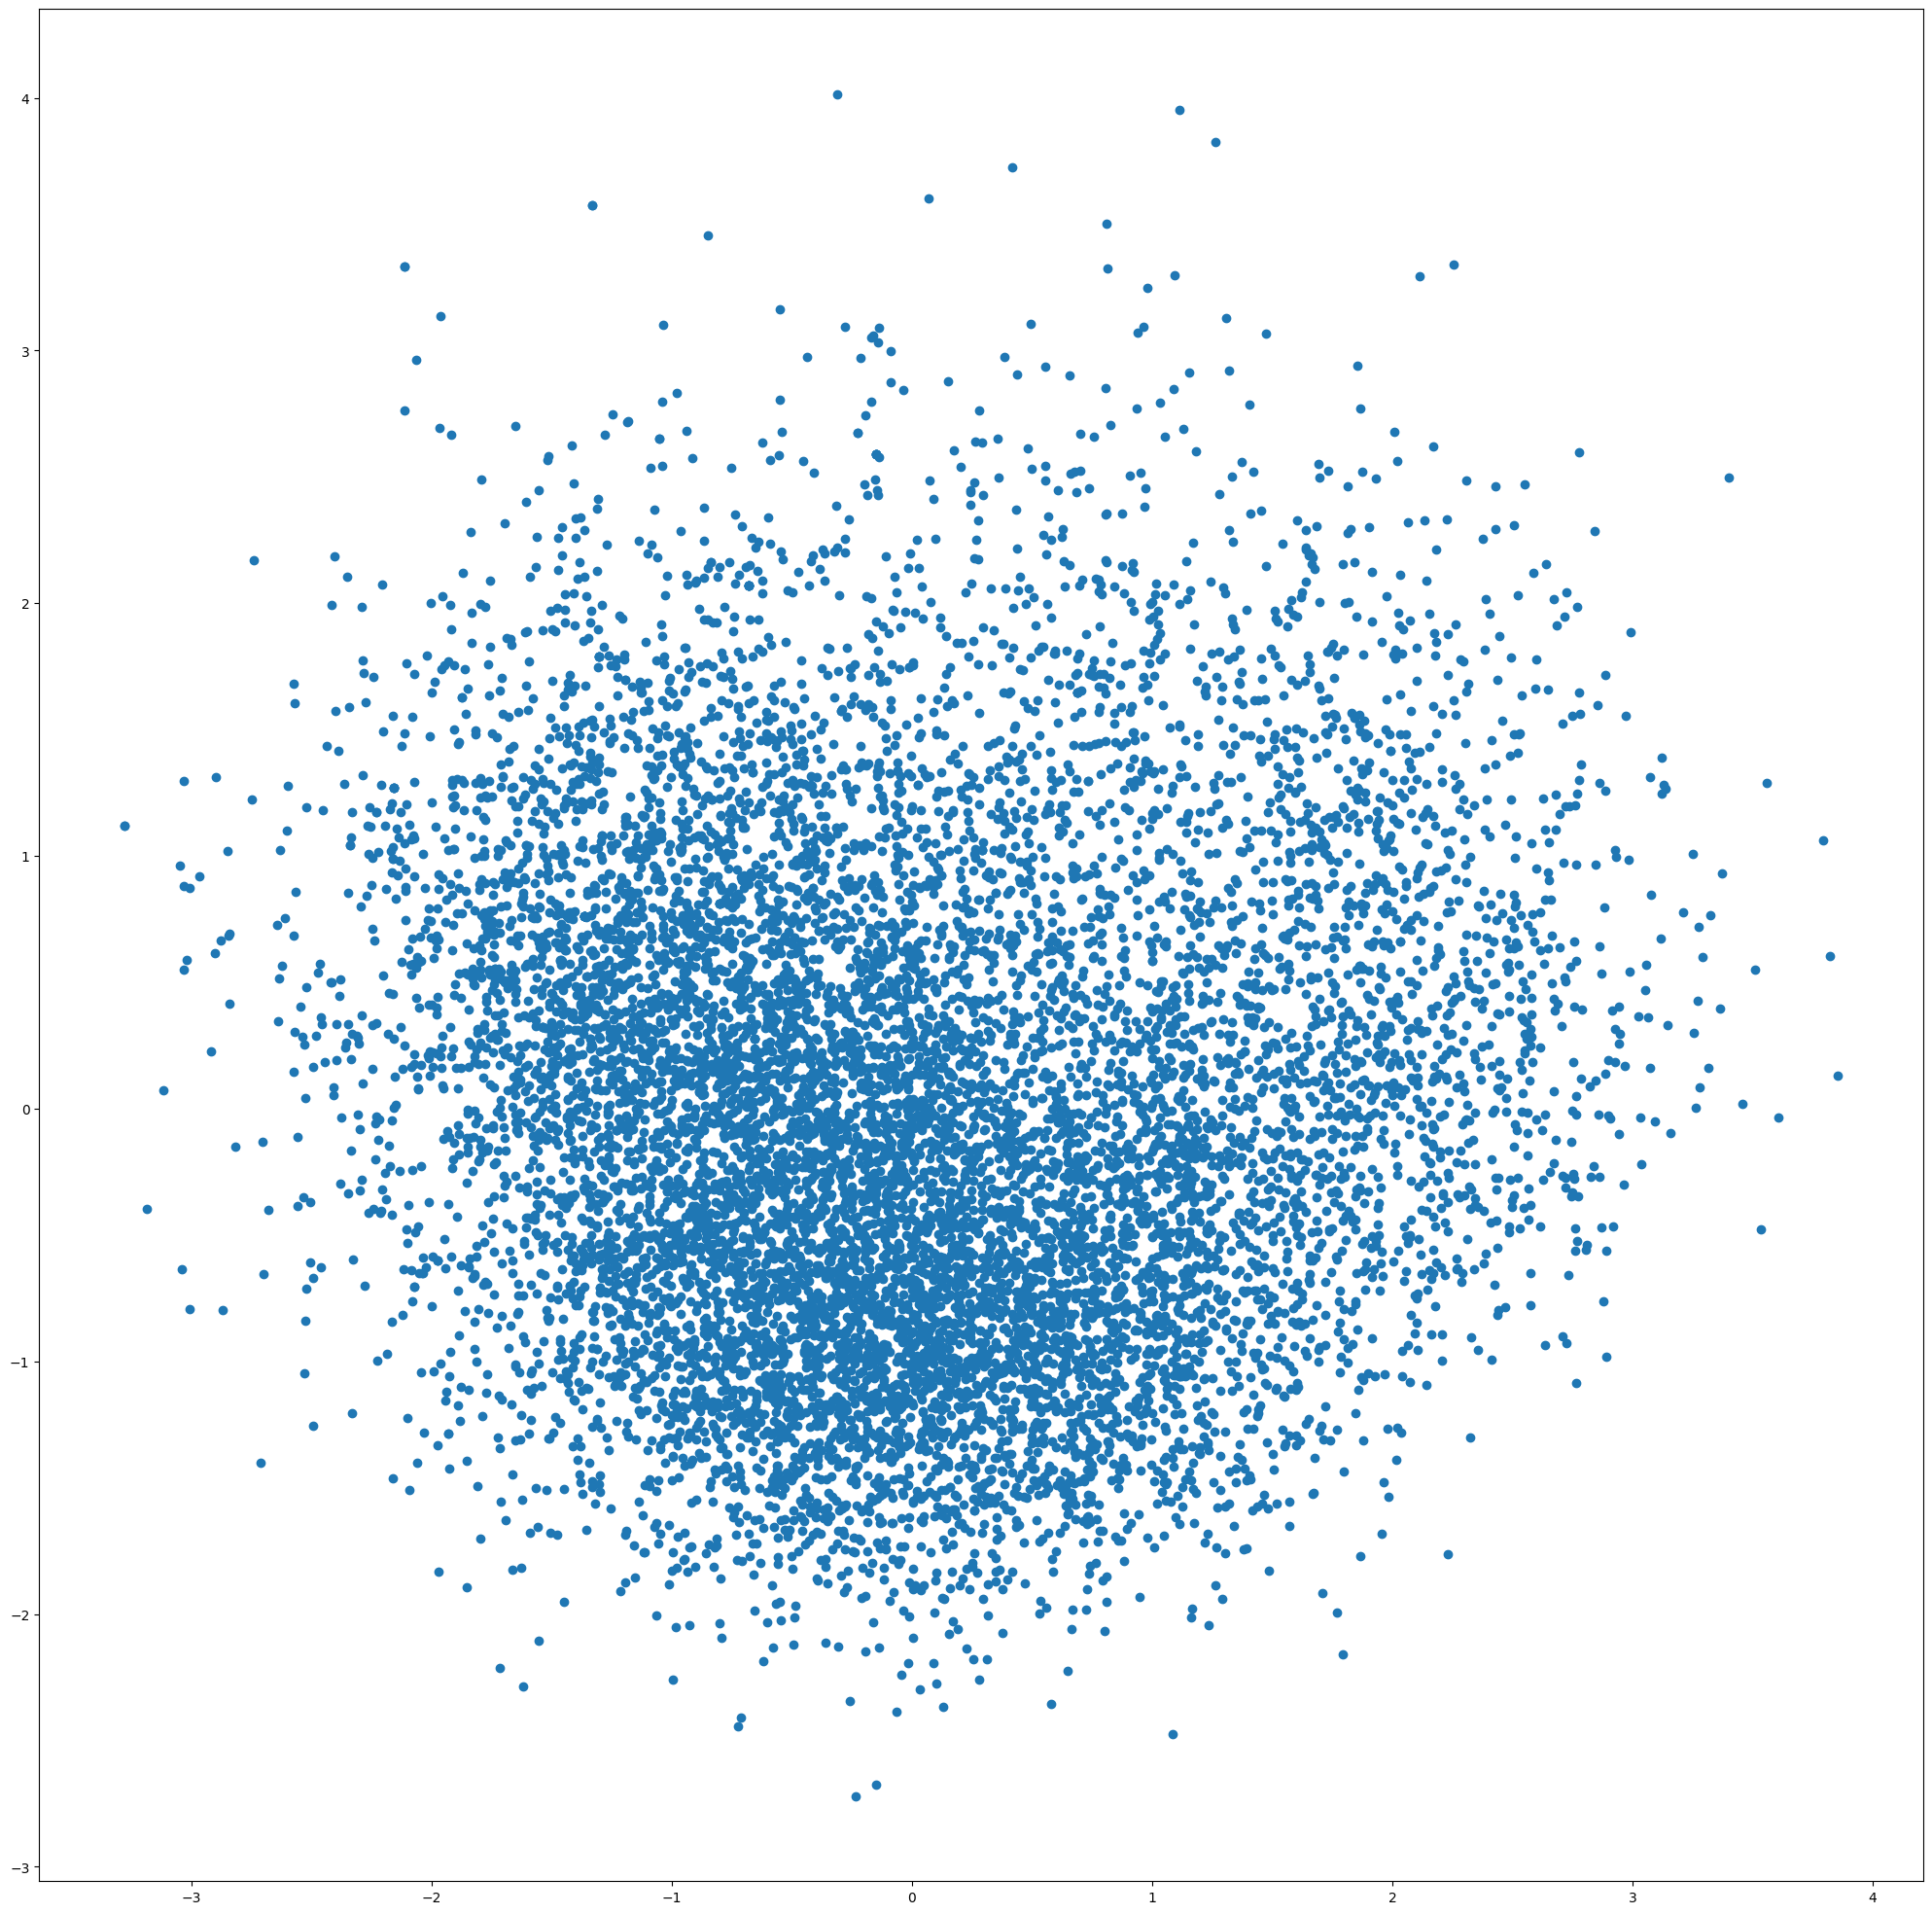

In [47]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
# M = np.random.rand(944, 1683)

pca = PCA(n_components=2)
reduced = pca.fit_transform(embeddings)

# We need a 2 x 944 array, not 944 by 2 (all X coordinates in one list)
t = reduced.transpose()

fig = plt.figure(figsize=(25,25))
ax = fig.add_subplot()
# projection = '3d'
ax.scatter(t[0], t[1])
plt.show()

In [48]:
df2 = pd.DataFrame()
df2['text'] = embeddings
df2.to_csv('/content/drive/MyDrive/690F project/temp1.csv')

In [49]:
df = pd.read_csv('/content/drive/MyDrive/690F project/temp1.csv')
print(df.head())

   Unnamed: 0                                               text
0           0  [-0.32734385  0.13976754  0.13807823 -0.286605...
1           1  [-2.02000692e-01 -1.00332737e-01 -2.74030212e-...
2           2  [-4.50822383e-01  2.37511713e-02  4.49386150e-...
3           3  [ 1.93579972e-01  2.16940925e-01 -3.24898869e-...
4           4  [ 7.77947828e-02  8.68077651e-02 -1.38576999e-...


In [50]:
print(len(df['text'][0]))

4657


In [51]:
from sklearn.cluster import KMeans
import numpy as np

# Example embeddings
# embeddings = [...]  # Replace this with your list of embeddings

# Choosing the number of clusters (K)
num_clusters = 25  # Adjust based on your requirements or experimentation

# Initialize and fit KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(embeddings)

# Assign clusters
cluster_assignments = kmeans.labels_

# If you want to use the cluster centers:
cluster_centers = kmeans.cluster_centers_

# Optional: print the first 10 cluster assignments
print(cluster_assignments[:10])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[14 13 13  2 11  8  1 23  5  5]


In [52]:
# df1['translated text'] = translated_texts
# # df1['original_text'] = new_text
# df1['original_tweet'] = new_text
# # df1['embeddings'] = embeddings
# df1['labels'] = cluster_assignments
# df1.to_csv('/content/drive/MyDrive/690F project/clusters.csv')

In [53]:
# print(df1.head())

In [54]:
cluster_counts = np.bincount(cluster_assignments)
print(cluster_counts)

[376 494 295 498 687 713 350 653 573 652  73 365 233 688 607 474 466 482
 468 357 296  88 523 487 155]


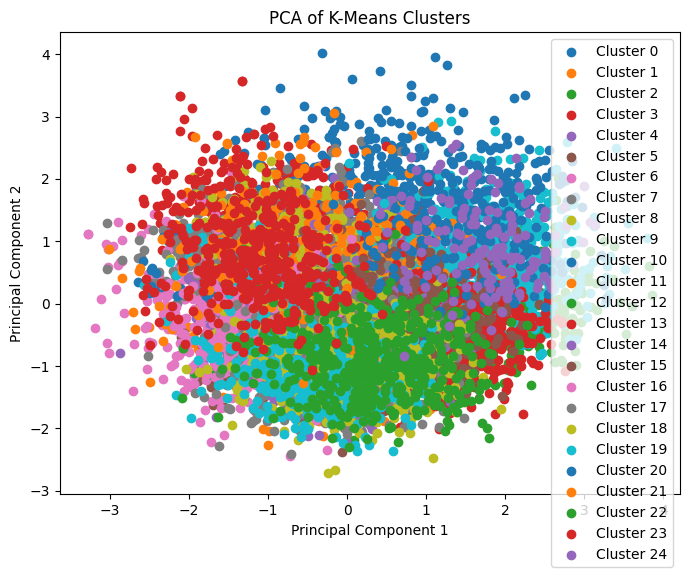

In [55]:
plt.figure(figsize=(8, 6))
for i in range(num_clusters):
    plt.scatter(reduced[cluster_assignments == i, 0], reduced[cluster_assignments == i, 1], label=f'Cluster {i}')
plt.title('PCA of K-Means Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [56]:
df1 = pd.DataFrame()

df1['text'] = new_text
df1['cluster'] = cluster_assignments

print(df1.head())
print(len(df1))

                                                text  cluster
0   TTA GIVEAWAY\n\n🎟️ 2 TTA Coupons = 60 tickets...       14
1   Anonymous poll for people who work for public...       13
2   What is your preferred way of learning a new ...       13
3   #NoVaccineApartheid #Novaccinepassports Shoul...        2
4    @BRWrestling Who is better in their profession?       11
11053


In [57]:
for i in range(num_clusters):
  with open('/content/drive/MyDrive/690F project/outputs/output{}.txt'.format(i), 'w') as file:
    df2 = df1[df1['cluster'] == i]
    for j in df2['text']:
      file.write('{}\n'.format(j))

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
# embeddings = [...]  # your list of embeddings

# Trying different numbers of clusters
cluster_range = range(1, 51)  # For example, from 1 to 10
inertias = []

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(embeddings)
    inertias.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(cluster_range, inertias, marker='o')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(cluster_range)
plt.show()